In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.svm import SVC
warnings.filterwarnings("ignore")
from sklearn import metrics,linear_model
from sklearn.tree import DecisionTreeClassifier
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,mean_squared_error

In [2]:
path="Customer Churn Data.xlsx"
names = ['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']
df = pd.read_excel(path, names = names,sheet_name='Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [4]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [6]:
print_unique_col_values(df)

Tenure: [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
Payment: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Gender: ['Female' 'Male' 'F' nan 'M']
Account_user_count: [3 4 nan 5 2 '@' 1 6]
account_segment: ['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']
Marital_Status: ['Single' 'Divorced' 'Married' nan]
rev_per_month: [9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]
rev_growth_yoy: [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]
coupon_used_for_payment: [1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]
Day_Since_CC_connect: [5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]
cashback: [159.93 120.9 nan ... 227.36 226.91 191.42]
Login_device: ['Mobile' 'Computer' '&&&&

In [7]:
df['account_segment']=df['account_segment'].replace('Regular +','Regular Plus')
df['account_segment']=df['account_segment'].replace('Super +','Super Plus')
df.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

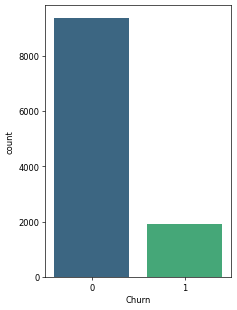

In [8]:
plt.figure(figsize=(4,6),dpi=60)
sns.countplot(data=df,x='Churn',palette='viridis')

In [9]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [10]:
df['Gender']=df['Gender'].replace('M','Male')
df['Gender']=df['Gender'].replace('F','Female')

In [11]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [12]:
df['rev_per_month'].count()

11158

In [13]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] ==2:
        binary_cols.append(col)

In [14]:
binary_cols

['Churn', 'Gender', 'Complain_ly']

In [15]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Cleaning the dataset

In [16]:
df['rev_per_month']=df['rev_per_month'].replace('+','')
df['rev_per_month']=pd.to_numeric(df['rev_per_month'])
df['rev_per_month']=df['rev_per_month'].replace('',df['rev_per_month'].mean())

In [17]:
df['Tenure']=df['Tenure'].replace('#','')
df['Tenure']=pd.to_numeric(df['Tenure'])
df['Tenure']=df['Tenure'].replace('',df['Tenure'].mean())

In [18]:
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('$','')
df['Day_Since_CC_connect']=pd.to_numeric(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('',df['Day_Since_CC_connect'].mean())

In [19]:
df['Account_user_count']=df['Account_user_count'].replace('@','')
df['Account_user_count']=pd.to_numeric(df['Account_user_count'])
df['Account_user_count']=df['Account_user_count'].replace('',df['Account_user_count'].mean())

In [20]:
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('$','')
df['rev_growth_yoy']=pd.to_numeric(df['rev_growth_yoy'])
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('',df['rev_growth_yoy'].mean())

In [21]:
df['cashback']=df['cashback'].replace('$','')
df['cashback']=pd.to_numeric(df['cashback'])
df['cashback']=df['cashback'].replace('',df['cashback'].mean())

In [22]:
df['Login_device']=df['Login_device'].replace('&&&&','Tab')
df['Login_device']=df['Login_device'].replace('','Tab')

In [23]:
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('$','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('#','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('*','')
df['coupon_used_for_payment']=pd.to_numeric(df['coupon_used_for_payment'])
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('',df['coupon_used_for_payment'].mean())

In [24]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [25]:
correlations = df.corr()

In [26]:
df.drop_duplicates(keep=False, inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

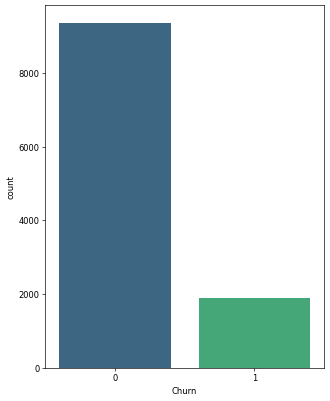

In [27]:
plt.figure(figsize=(6,8),dpi=60)
sns.countplot(data=df,x='Churn',palette='viridis')

In [28]:
df.shape

(11260, 19)

<AxesSubplot:>

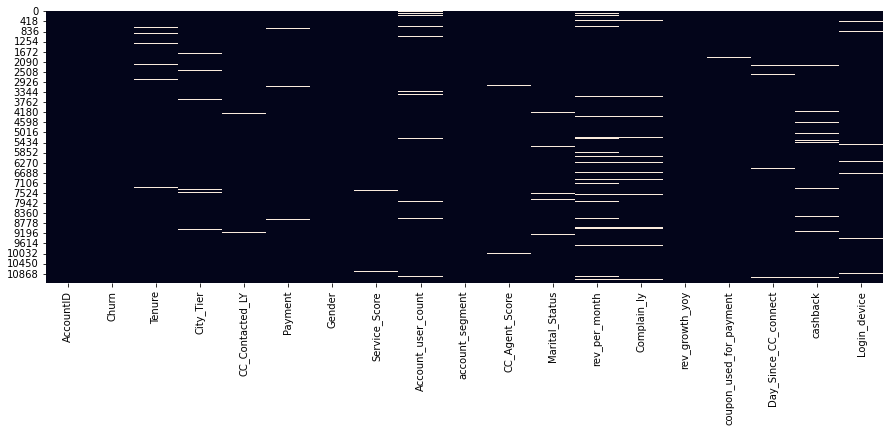

In [29]:
#dsitribution of the null values in the dataset
plt.figure(figsize=(15,5))
sns.heatmap(df.isna(),cbar=False)

In [111]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [31]:
#checking the null values in all the columns
na_cols = df.isna().any()
print(na_cols)

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy              True
coupon_used_for_payment     True
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool


In [32]:
#Missing Values Treatment for Non Categorical Values
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
            
            if df[col].dtype != 'object':
                 df[col] =  df[col].fillna(df[col].mean()).round(0)            

In [33]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [34]:
df['Payment']=df['Payment'].fillna(df['Payment'].mode())

In [35]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [36]:
df['Login_device']=df['Login_device'].fillna("Mobile")

In [37]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device                 0
dtype: int64

In [38]:
value=df.values
print(value)

[[20000 1 4.0 ... 5.0 160.0 'Mobile']
 [20001 1 0.0 ... 0.0 121.0 'Mobile']
 [20002 1 0.0 ... 3.0 196.0 'Mobile']
 ...
 [31257 0 1.0 ... 4.0 191.0 'Mobile']
 [31258 0 23.0 ... 9.0 180.0 'Computer']
 [31259 0 8.0 ... 3.0 175.0 'Mobile']]


In [39]:
from sklearn.impute import SimpleImputer
from numpy import isnan
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

 
# transform the dataset
transformed_values = imputer.fit_transform(value)

In [40]:
#missing values treatment for categorical Values
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)


In [41]:
df.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [42]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196.0,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile


In [43]:
contract_split = df[[ "AccountID", "Payment"]]
sectors = contract_split .groupby ("Payment")
contract_split = pd.DataFrame(sectors["AccountID"].count())
contract_split.rename(columns={'AccountID':'No. of customers'}, inplace=True)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1080x360 with 0 Axes>

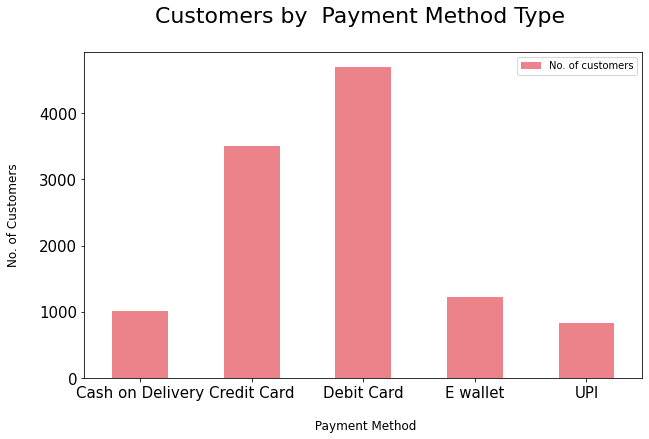

In [44]:
plt.figure(figsize=(15,5))
ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method',legend =True, table = False, 
grid = False,  subplots = False,figsize =(10, 6), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by  Payment Method Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

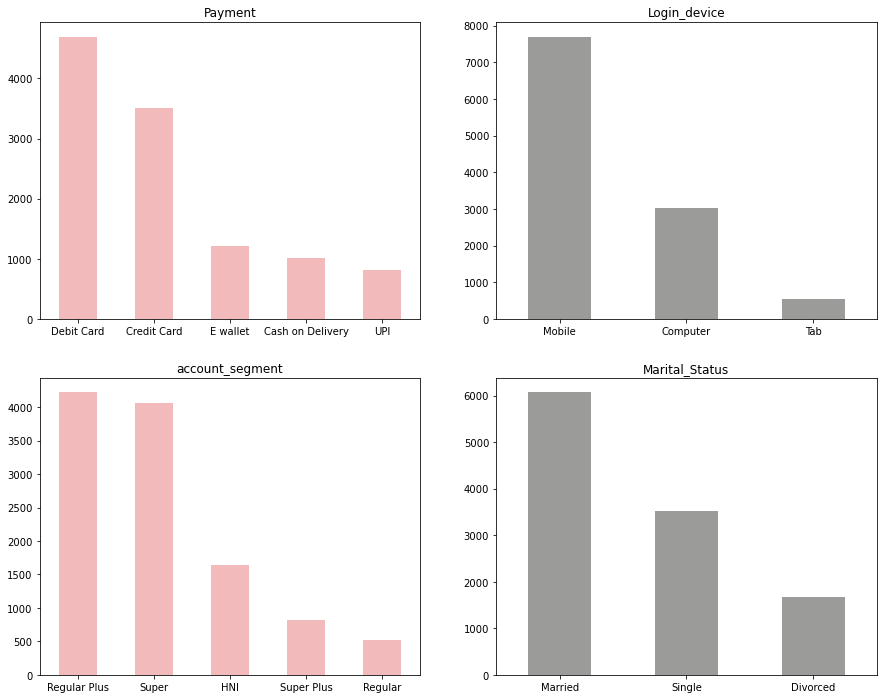

In [45]:
services= ['Payment','account_segment',
'Marital_Status','Login_device']
fig, axes = plt.subplots(nrows = 2,ncols = 2,
figsize = (15,12))
for i, item in enumerate(services):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        ax.set_title(item)
        
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        ax.set_title(item)

<Figure size 1080x360 with 0 Axes>

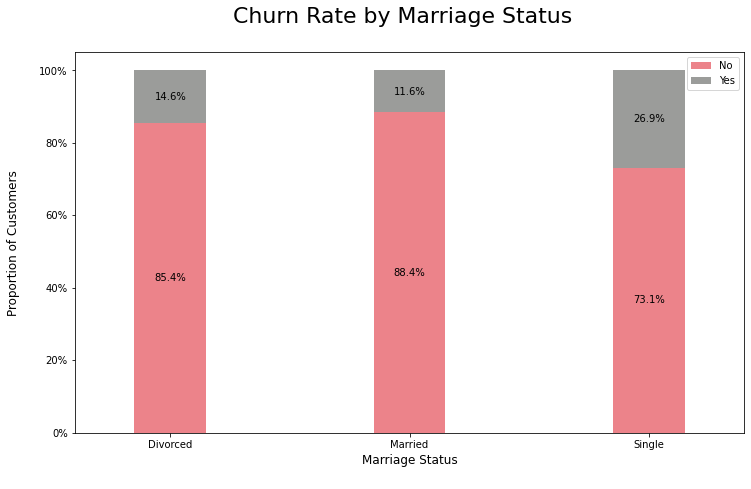

In [46]:
import matplotlib.ticker as mtick
plt.figure(figsize=(15,5))
contract_churn =df.groupby(['Marital_Status','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Marriage Status\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Marriage Status  \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


<Figure size 1080x360 with 0 Axes>

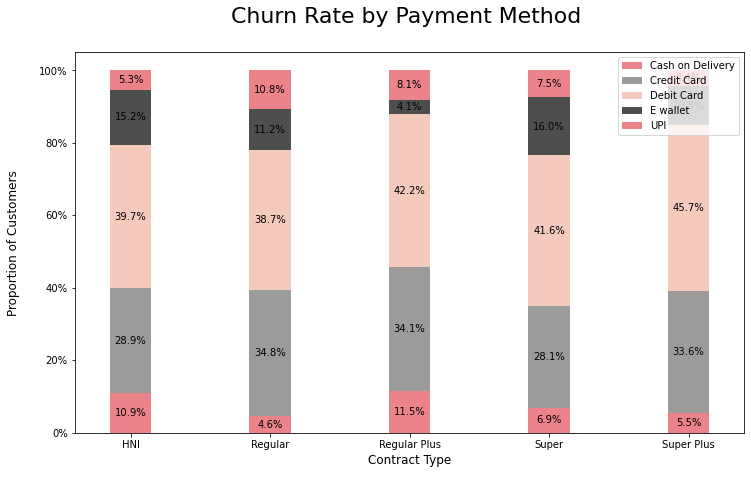

In [47]:

plt.figure(figsize=(15,5))
segment_churn = df.groupby(['account_segment','Payment']).size().unstack()
segment_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838b','#9b9c9a', '#f3cabc' , '#4d4f4c']
ax = (segment_churn.T*100.0 / segment_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


In [48]:
dataset2 = df[['Payment','account_segment','Marital_Status','Login_device']]
dataset2.head()

,Payment,account_segment,Marital_Status,Login_device
0,Debit Card,Super,Single,Mobile
1,UPI,Regular Plus,Single,Mobile
2,Debit Card,Regular Plus,Single,Mobile
3,Debit Card,Super,Single,Mobile
4,Credit Card,Regular Plus,Single,Mobile


In [49]:
correlations = df.corr()['Churn'].sort_values(ascending = False)
for i in correlations:
    print(i)

1.0
0.24635002235367898
0.10516514573086404
0.10453363862808077
0.08352172721244512
0.07173463778259558
0.021882320010373057
0.008935889933337287
-0.009541386555324641
-0.013870049488837405
-0.014838399408950705
-0.0316573039176082
-0.145355904311918
-0.23032682555327275


Text(0.5, 0, 'Login Device')

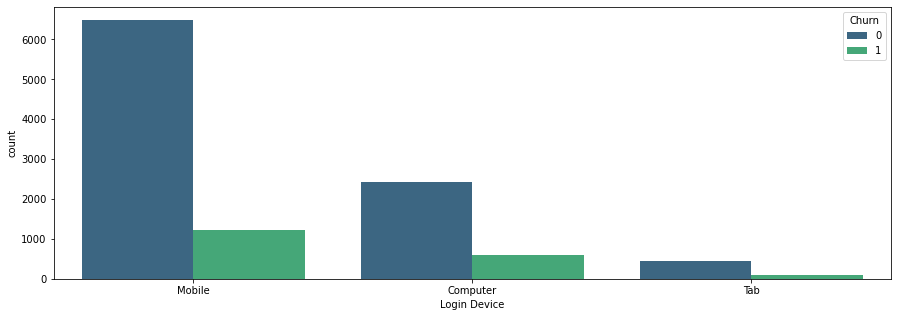

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Login_device',hue='Churn',palette='viridis')
plt.xlabel('Login Device')

In [51]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196.0,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile


## All Variables with churn

Text(0.5, 0, 'User Per Account')

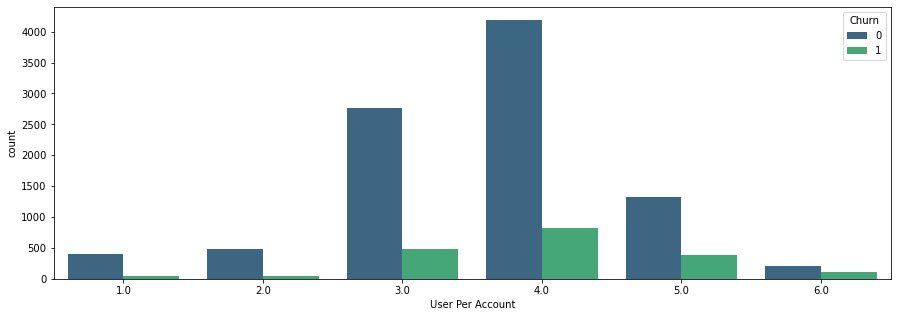

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Account_user_count',hue='Churn',palette='viridis')
plt.xlabel('User Per Account')


Text(0.5, 0, 'Payment')

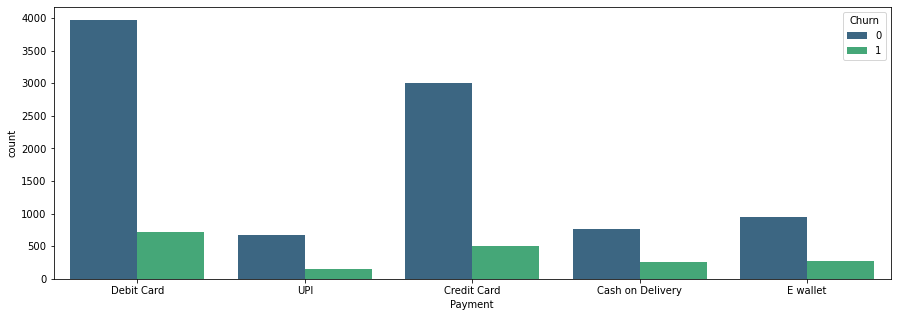

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Payment',hue='Churn',palette='viridis')
plt.xlabel('Payment')

Text(0.5, 0, 'Service Score')

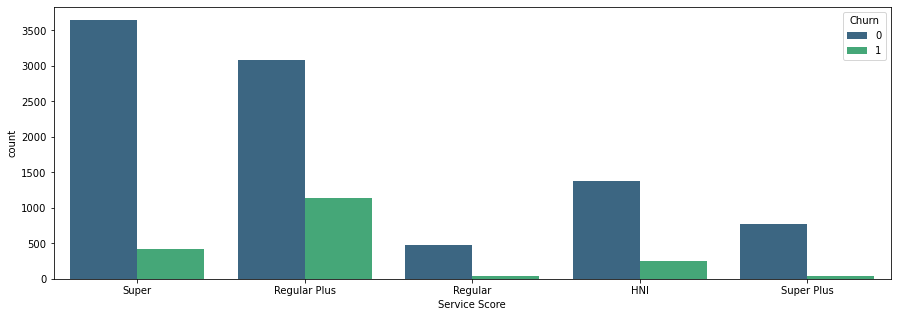

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='account_segment',hue='Churn',palette='viridis')
plt.xlabel('Service Score')

<AxesSubplot:>

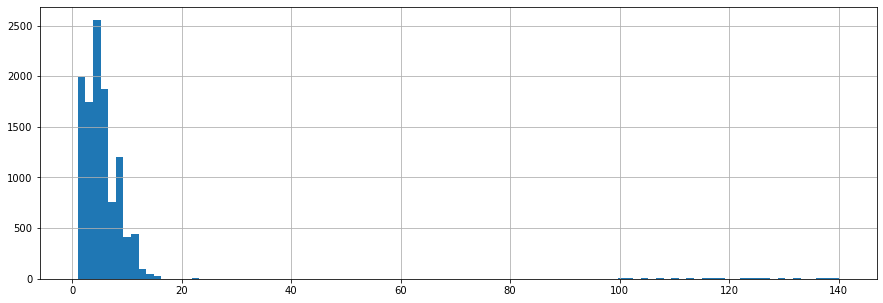

In [55]:
plt.figure(figsize=(15,5))
df['rev_per_month'].hist(bins=100)

In [56]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

<Figure size 360x360 with 0 Axes>

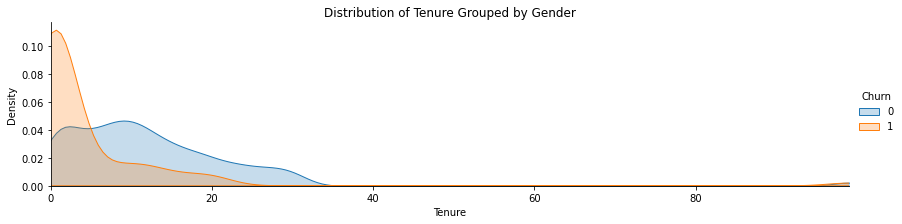

<Figure size 360x360 with 0 Axes>

In [57]:
fig = sns.FacetGrid(df, hue='Churn', aspect=4)
fig.map(sns.kdeplot, 'Tenure', shade=True)
oldest = df['Tenure'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Tenure Grouped by Gender')
fig.add_legend()
plt.figure(figsize=(5,5))

<Figure size 1080x360 with 0 Axes>

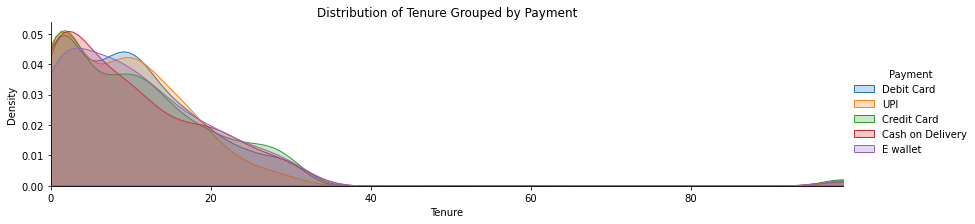

In [58]:
plt.figure(figsize=(15,5))
fig = sns.FacetGrid(df, hue='Payment', aspect=4)
fig.map(sns.kdeplot, 'Tenure', shade=True)
oldest = df['Tenure'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Tenure Grouped by Payment')
fig.add_legend()

<Figure size 1080x360 with 0 Axes>

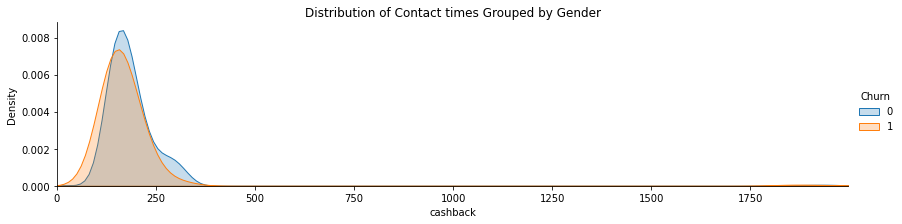

In [59]:
plt.figure(figsize=(15,5))
fig = sns.FacetGrid(df, hue='Churn', aspect=4)
fig.map(sns.kdeplot, 'cashback', shade=True)
oldest = df['cashback'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Contact times Grouped by Gender')
fig.add_legend()

<Figure size 1080x360 with 0 Axes>

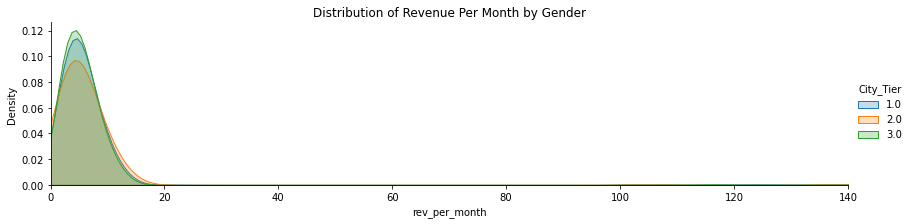

In [60]:
plt.figure(figsize=(15,5))
fig = sns.FacetGrid(df, hue='City_Tier', aspect=4)
fig.map(sns.kdeplot, 'rev_per_month', shade=True)
oldest = df['rev_per_month'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Revenue Per Month by Gender')
fig.add_legend()

<Figure size 1080x360 with 0 Axes>

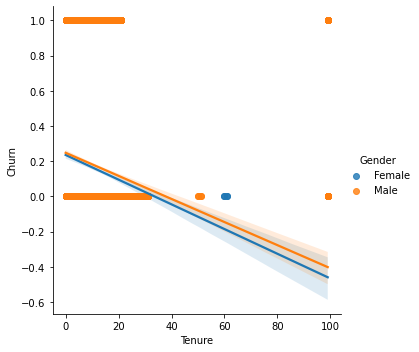

In [61]:
plt.figure(figsize=(15,5))
sns.lmplot('Tenure', 'Churn', data=df,hue='Gender')

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

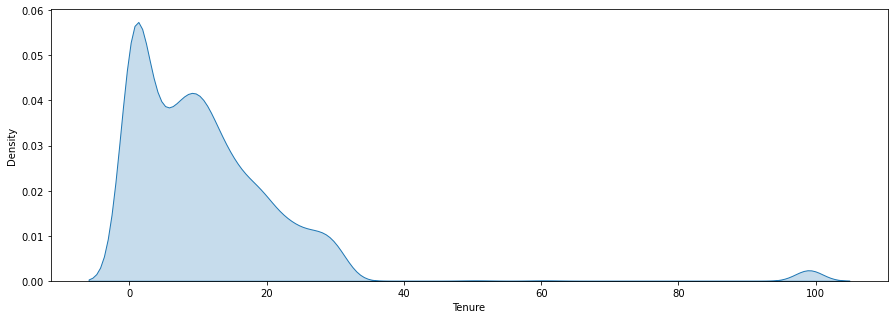

In [62]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Tenure'],shade=True)

<Figure size 360x360 with 0 Axes>

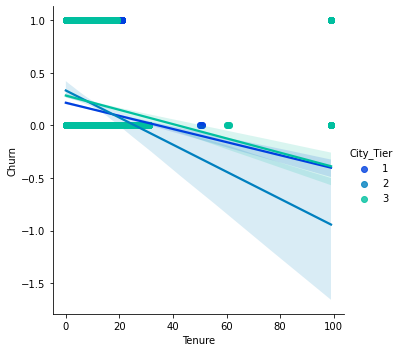

In [63]:
plt.figure(figsize=(5,5))
sns.lmplot('Tenure', 'Churn', hue='City_Tier', data=df, palette='winter', hue_order=range(1,4))


<Figure size 1080x360 with 0 Axes>

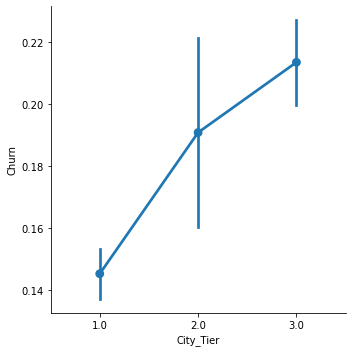

In [64]:
plt.figure(figsize=(15,5))
sns.factorplot('City_Tier', 'Churn', data=df)


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

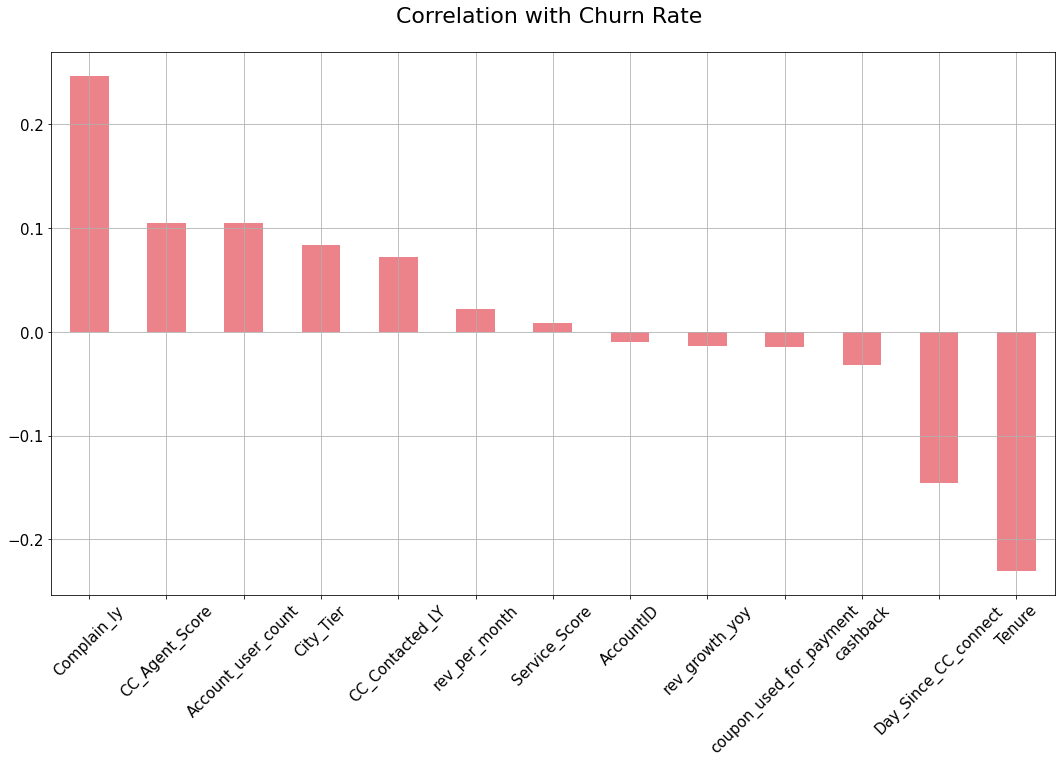

In [65]:
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

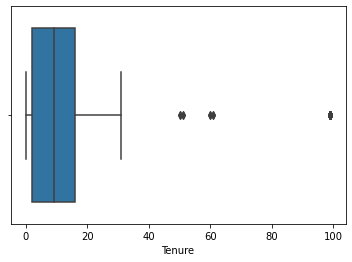

In [66]:
import seaborn as sns
#sns.boxplot(x=boston_df['DIS'])
sns.boxplot(x=df['Tenure'])
 
# show plot
plt.show()


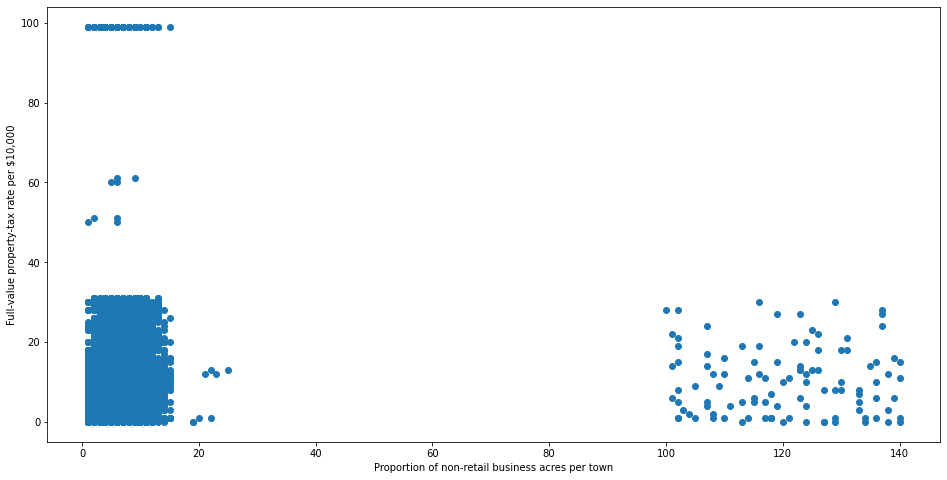

In [67]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['rev_per_month'], df['Tenure'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [68]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,11.024600,1.657371,17.868295,2.903375,3.704973,3.065808,6.337123,0.276288,16.193339,1.790675,4.644849,196.222114
std,3250.62635,0.374223,12.754482,0.911100,8.813084,0.722476,1.004383,1.372663,11.484085,0.447181,3.757222,1.969291,3.638945,174.864197
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,148.000000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,4.000000,167.000000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.000000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [69]:
col1=[]
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        col1.append(col)



In [70]:
col1

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

In [71]:
df2 = pd.get_dummies(data=df, columns=col1)
df2.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Payment_Cash on Delivery', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Female', 'Gender_Male',
       'account_segment_HNI', 'account_segment_Regular',
       'account_segment_Regular Plus', 'account_segment_Super',
       'account_segment_Super Plus', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Computer', 'Login_device_Mobile', 'Login_device_Tab'],
      dtype='object')

In [72]:
# identify outliers
data_mean, data_std = np.mean(df2['Tenure']), np.std(df2['Tenure'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [73]:
outliers = [x for x in df['Tenure'] if x < lower or x > upper]

In [74]:
len(outliers)

139

In [76]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AccountID                       5629.5
Churn                              0.0
Tenure                            14.0
City_Tier                          2.0
CC_Contacted_LY                   12.0
Service_Score                      1.0
Account_user_count                 1.0
CC_Agent_Score                     2.0
rev_per_month                      4.0
Complain_ly                        1.0
rev_growth_yoy                     6.0
coupon_used_for_payment            1.0
Day_Since_CC_connect               5.0
cashback                          49.0
Payment_Cash on Delivery           0.0
Payment_Credit Card                1.0
Payment_Debit Card                 1.0
Payment_E wallet                   0.0
Payment_UPI                        0.0
Gender_Female                      1.0
Gender_Male                        1.0
account_segment_HNI                0.0
account_segment_Regular            0.0
account_segment_Regular Plus       1.0
account_segment_Super              1.0
account_segment_Super Plu

In [77]:
def remove_outliers(x):

    ## storing names of columns in Column_Names
    Column_Names=x.columns

    ## importing matplotlib and seaborn for visualisation of outliers
    import matplotlib.pyplot as plt
    import seaborn as sns   

    ## iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
    for j in Column_Names:
        try:
            print('Before Removing Outliers')

            ##visualisation of outliers
            a = sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show() 

            xy=x[j]    
            mydata=pd.DataFrame()

            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR

            ## using the maximum and minimum values obtained from quartiles and inter-quartile range
            ## any outliers greater than maximum are updated to be equal to maximum
            ## any outliers lesser than minimum are updated to be equal to minimum
            ## here, no outliers have been removed to prevent loss of data

            for i in xy:
                if(i>maximum):
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)

            x[j]=updated
            print('After Removing Outliers')

            ## visualising after removing outliers
            b= sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show()

        except:
            continue

    return x

In [78]:

df1=df2.drop('Churn', axis=1)

In [79]:
df1.columns

Index(['AccountID', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Cash on Delivery', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
       'Gender_Female', 'Gender_Male', 'account_segment_HNI',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Computer', 'Login_device_Mobile',
       'Login_device_Tab'],
      dtype='object')

In [80]:
df1.head()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,20000,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,1,0,0,0,1,0,1,0
1,20001,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0,1,0,0,0,0,1,0,1,0
2,20002,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,1,0,0,0,0,1,0,1,0
3,20003,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,0,1,0,0,0,1,0,1,0
4,20004,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0,1,0,0,0,0,1,0,1,0


In [81]:
print(df2.shape)
df2.head()

(11260, 32)


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,1,0,0,0,0,1,0,1,0
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,0


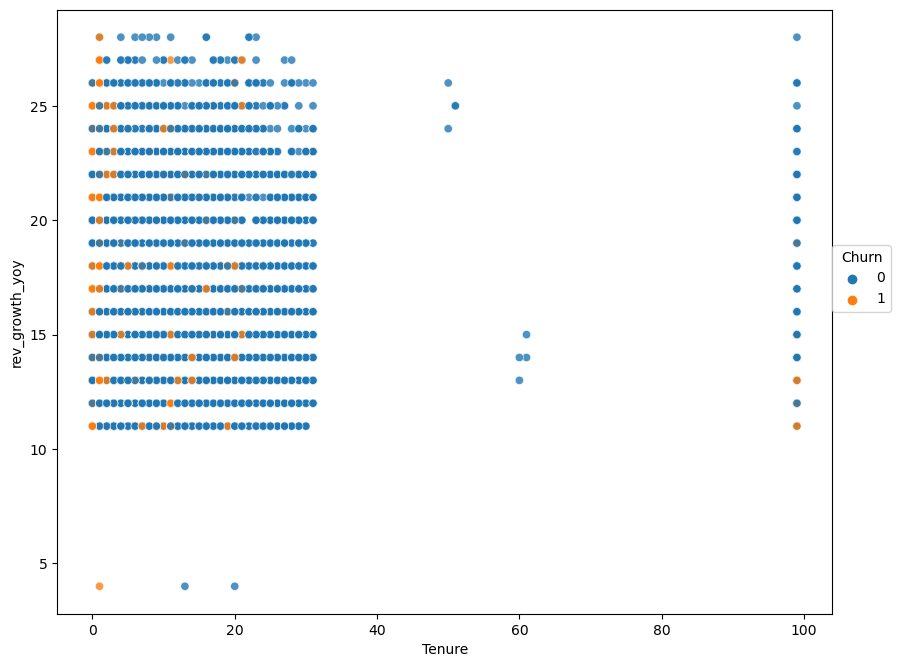

In [82]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=df2,x='Tenure',y='rev_growth_yoy',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")

In [83]:
df_corr=dataset2.corr()

In [84]:
df['Tenure'].describe()

count    11260.000000
mean        11.024600
std         12.754482
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

In [85]:
def yearly_tenure(tenure):
    if tenure <= 12:
        return 1
    elif tenure >12 and tenure <=24:
        return 2
    elif tenure >24 and tenure <=36:
        return 3
    elif tenure >36 and tenure <=48:
        return 4
    elif tenure >48 and tenure <=60:
        return 5
    elif tenure > 60 and tenure <=72:
        return 6

In [86]:
df2.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,1,0,0,0,0,1,0,1,0
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,0


## All variables with churn rate

In [87]:
df1['rev_per_month'].describe()

count    11260.000000
mean         6.337123
std         11.484085
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
cols_to_scale =df1.columns
print(cols_to_scale)


Index(['AccountID', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Cash on Delivery', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
       'Gender_Female', 'Gender_Male', 'account_segment_HNI',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Computer', 'Login_device_Mobile',
       'Login_device_Tab'],
      dtype='object')


In [90]:
df2.dtypes

AccountID                         int64
Churn                             int64
Tenure                          float64
City_Tier                       float64
CC_Contacted_LY                 float64
Service_Score                   float64
Account_user_count              float64
CC_Agent_Score                  float64
rev_per_month                   float64
Complain_ly                     float64
rev_growth_yoy                  float64
coupon_used_for_payment         float64
Day_Since_CC_connect            float64
cashback                        float64
Payment_Cash on Delivery          uint8
Payment_Credit Card               uint8
Payment_Debit Card                uint8
Payment_E wallet                  uint8
Payment_UPI                       uint8
Gender_Female                     uint8
Gender_Male                       uint8
account_segment_HNI               uint8
account_segment_Regular           uint8
account_segment_Regular Plus      uint8
account_segment_Super             uint8


In [91]:
df2.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,1,0,0,0,0,1,0,1,0
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [92]:
cols_to_scale=['Tenure','CC_Contacted_LY','City_Tier','Service_Score','Account_user_count','rev_growth_yoy','Day_Since_CC_connect','coupon_used_for_payment','Complain_ly','CC_Agent_Score','rev_per_month']

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [94]:
df1.head()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,20000,0.040404,1.0,0.015625,0.6,0.4,0.25,0.057554,1.0,0.291667,...,0,0,1,0,0,0,1,0,1,0
1,20001,0.000000,0.0,0.031250,0.6,0.6,0.50,0.043165,1.0,0.458333,...,0,1,0,0,0,0,1,0,1,0
2,20002,0.000000,0.0,0.203125,0.4,0.6,0.50,0.035971,1.0,0.416667,...,0,1,0,0,0,0,1,0,1,0
3,20003,0.000000,1.0,0.085938,0.4,0.6,1.00,0.050360,0.0,0.791667,...,0,0,1,0,0,0,1,0,1,0
4,20004,0.000000,0.0,0.062500,0.4,0.4,1.00,0.014388,0.0,0.291667,...,0,1,0,0,0,0,1,0,1,0


In [95]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

AccountID: [20000 20001 20002 ... 31257 31258 31259]
Tenure: [0.04040404 0.         0.02020202 0.13131313 0.11111111 0.09090909
 1.         0.19191919 0.2020202  0.14141414 0.08080808 0.26262626
 0.18181818 0.05050505 0.3030303  0.07070707 0.01010101 0.23232323
 0.03030303 0.29292929 0.06060606 0.28282828 0.24242424 0.25252525
 0.16161616 0.1010101  0.15151515 0.22222222 0.27272727 0.12121212
 0.21212121 0.17171717 0.50505051 0.60606061 0.31313131 0.51515152
 0.61616162]
City_Tier: [1.  0.  0.5]
CC_Contacted_LY: [0.015625  0.03125   0.203125  0.0859375 0.0625    0.140625  0.0546875
 0.0390625 0.2109375 0.109375  0.0703125 0.125     0.1953125 0.1875
 0.171875  0.078125  0.046875  0.1640625 0.1796875 0.1015625 0.1484375
 0.2265625 0.1171875 0.2421875 0.15625   0.09375   0.21875   0.1328125
 0.234375  0.0078125 0.        0.953125  0.0234375 0.25      0.9609375
 0.296875  0.265625  0.2578125 0.2734375 0.28125   0.2890625 1.
 0.3046875 0.9765625]
Service_Score: [0.6 0.4 0.2 0.  0.8 1. ]
Acc

In [96]:
X= pd.get_dummies(df1.drop(['AccountID'],axis=1),drop_first=True)
y= df2['Churn']

In [97]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    9364
0    9364
Name: Churn, dtype: int64

In [98]:
y_sm.unique()

array([1, 0], dtype=int64)

In [99]:
X_sm[:5]

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab
0,0.040404,1.0,0.015625,0.6,0.4,0.25,0.057554,1.0,0.291667,0.0625,...,0,0,1,0,0,0,1,0,1,0
1,0.000000,0.0,0.031250,0.6,0.6,0.50,0.043165,1.0,0.458333,0.0000,...,0,1,0,0,0,0,1,0,1,0
2,0.000000,0.0,0.203125,0.4,0.6,0.50,0.035971,1.0,0.416667,0.0000,...,0,1,0,0,0,0,1,0,1,0
3,0.000000,1.0,0.085938,0.4,0.6,1.00,0.050360,0.0,0.791667,0.0000,...,0,0,1,0,0,0,1,0,1,0
4,0.000000,0.0,0.062500,0.4,0.4,1.00,0.014388,0.0,0.291667,0.0625,...,0,1,0,0,0,0,1,0,1,0


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5)

In [101]:
len(X_train.columns)

30

In [102]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [103]:
df2.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,...,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Tab,Exited
18660,0.000000,1.0,0.093750,0.4,0.6,1.00,0.040011,0.0,0.541667,0.214908,...,0,0,0,0,1,0,0,1,0,1
7658,0.000000,1.0,0.195312,0.4,0.6,0.75,0.007194,1.0,0.625000,0.000000,...,1,0,0,0,1,0,0,1,0,1
5640,0.040404,0.0,0.132812,0.4,0.4,0.50,0.035971,0.0,0.375000,0.562500,...,0,0,0,1,0,0,0,1,0,1
6365,0.000000,0.0,0.054688,0.4,0.6,0.25,0.007194,1.0,0.375000,0.000000,...,1,0,0,1,0,0,1,0,0,1
1898,0.131313,0.0,0.031250,0.4,0.6,0.00,0.000000,1.0,0.666667,0.000000,...,1,0,0,0,0,1,0,1,0,0


In [104]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [105]:
# Class count
count_class_0, count_class_1 = df2.Exited.value_counts()

# Divide by class
df2_class_0 = df2[df2['Exited'] == 0]
df2_class_1 = df2[df2['Exited'] == 1]

In [106]:
X_train.shape

(14982, 30)

In [107]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [108]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(30, input_dim=30, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [112]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
280/280 [==============================] - 0s 407us/step - loss: 0.4795 - accuracy: 0.8280
Epoch 2/100
280/280 [==============================] - 0s 414us/step - loss: 0.4105 - accuracy: 0.8373
Epoch 3/100
280/280 [==============================] - 0s 436us/step - loss: 0.3707 - accuracy: 0.8465
Epoch 4/100
280/280 [==============================] - 0s 414us/step - loss: 0.3550 - accuracy: 0.8491
Epoch 5/100
280/280 [==============================] - 0s 427us/step - loss: 0.3339 - accuracy: 0.8565
Epoch 6/100
280/280 [==============================] - 0s 414us/step - loss: 0.3407 - accuracy: 0.8566
Epoch 7/100
280/280 [==============================] - 0s 413us/step - loss: 0.3282 - accuracy: 0.8613
Epoch 8/100
280/280 [==============================] - 0s 408us/step - loss: 0.3292 - accuracy: 0.8624
Epoch 9/100
280/280 [==============================] - 0s 395us/step - loss: 0.3206 - accuracy: 0.8639
Epoch 10/100
280/280 [==============================] - 0s 395us/step - l

280/280 [==============================] - 0s 412us/step - loss: 0.2750 - accuracy: 0.8823
Epoch 80/100
280/280 [==============================] - 0s 390us/step - loss: 0.2530 - accuracy: 0.8857
Epoch 81/100
280/280 [==============================] - 0s 394us/step - loss: 0.2591 - accuracy: 0.8866
Epoch 82/100
280/280 [==============================] - 0s 401us/step - loss: 0.2633 - accuracy: 0.8871
Epoch 83/100
280/280 [==============================] - 0s 404us/step - loss: 0.2588 - accuracy: 0.8877
Epoch 84/100
280/280 [==============================] - 0s 399us/step - loss: 0.2567 - accuracy: 0.8825
Epoch 85/100
280/280 [==============================] - 0s 400us/step - loss: 0.2662 - accuracy: 0.8828
Epoch 86/100
280/280 [==============================] - 0s 407us/step - loss: 0.2571 - accuracy: 0.8859
Epoch 87/100
280/280 [==============================] - 0s 404us/step - loss: 0.2551 - accuracy: 0.8870
Epoch 88/100
280/280 [==============================] - 0s 429us/step - loss:

In [113]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
280/280 [==============================] - 0s 395us/step - loss: 0.7294 - accuracy: 0.8199
Epoch 2/100
280/280 [==============================] - 0s 397us/step - loss: 0.4140 - accuracy: 0.8346
Epoch 3/100
280/280 [==============================] - 0s 414us/step - loss: 0.3796 - accuracy: 0.8435
Epoch 4/100
280/280 [==============================] - 0s 406us/step - loss: 0.3853 - accuracy: 0.8473
Epoch 5/100
280/280 [==============================] - 0s 415us/step - loss: 0.3421 - accuracy: 0.8538
Epoch 6/100
280/280 [==============================] - 0s 407us/step - loss: 0.3507 - accuracy: 0.8545
Epoch 7/100
280/280 [==============================] - 0s 436us/step - loss: 0.3336 - accuracy: 0.8557
Epoch 8/100
280/280 [==============================] - 0s 531us/step - loss: 0.3359 - accuracy: 0.8607
Epoch 9/100
280/280 [==============================] - 0s 508us/step - loss: 0.3427 - accuracy: 0.8598
Epoch 10/100
280/280 [==============================] - 0s 517us/step - l

280/280 [==============================] - 0s 471us/step - loss: 0.2368 - accuracy: 0.9021
Epoch 80/100
280/280 [==============================] - 0s 489us/step - loss: 0.2362 - accuracy: 0.8994
Epoch 81/100
280/280 [==============================] - 0s 423us/step - loss: 0.2324 - accuracy: 0.9023
Epoch 82/100
280/280 [==============================] - 0s 426us/step - loss: 0.2480 - accuracy: 0.8976
Epoch 83/100
280/280 [==============================] - 0s 441us/step - loss: 0.2339 - accuracy: 0.8978
Epoch 84/100
280/280 [==============================] - 0s 424us/step - loss: 0.2432 - accuracy: 0.8992
Epoch 85/100
280/280 [==============================] - 0s 464us/step - loss: 0.2333 - accuracy: 0.9007
Epoch 86/100
280/280 [==============================] - 0s 503us/step - loss: 0.2371 - accuracy: 0.8994
Epoch 87/100
280/280 [==============================] - 0s 416us/step - loss: 0.2383 - accuracy: 0.8997
Epoch 88/100
280/280 [==============================] - 0s 425us/step - loss:

In [114]:
df1.columns

Index(['AccountID', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Cash on Delivery', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
       'Gender_Female', 'Gender_Male', 'account_segment_HNI',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Computer', 'Login_device_Mobile',
       'Login_device_Tab'],
      dtype='object')

In [115]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df2_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df2_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
0    7530
1    7530
Name: Exited, dtype: int64


In [116]:
df2_class_0_under = df2_class_0.sample(count_class_1)
df_test_under = pd.concat([df2_class_0_under, df2_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    7452
1    7452
Name: Exited, dtype: int64


In [117]:
from sklearn.model_selection import train_test_split
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=15, stratify=y)

In [118]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
373/373 [==============================] - 0s 430us/step - loss: 0.6706 - accuracy: 0.6238
Epoch 2/100
373/373 [==============================] - 0s 400us/step - loss: 0.5927 - accuracy: 0.7216
Epoch 3/100
373/373 [==============================] - 0s 401us/step - loss: 0.5306 - accuracy: 0.7627
Epoch 4/100
373/373 [==============================] - 0s 397us/step - loss: 0.5090 - accuracy: 0.7693
Epoch 5/100
373/373 [==============================] - 0s 448us/step - loss: 0.4825 - accuracy: 0.7808
Epoch 6/100
373/373 [==============================] - 0s 446us/step - loss: 0.4738 - accuracy: 0.7871
Epoch 7/100
373/373 [==============================] - 0s 462us/step - loss: 0.4597 - accuracy: 0.7975
Epoch 8/100
373/373 [==============================] - 0s 474us/step - loss: 0.4510 - accuracy: 0.7992
Epoch 9/100
373/373 [==============================] - 0s 416us/step - loss: 0.4516 - accuracy: 0.8025
Epoch 10/100
373/373 [==============================] - 0s 485us/step - l

373/373 [==============================] - 0s 404us/step - loss: 0.3122 - accuracy: 0.8655
Epoch 78/100
373/373 [==============================] - 0s 397us/step - loss: 0.3123 - accuracy: 0.8660
Epoch 79/100
373/373 [==============================] - 0s 394us/step - loss: 0.3217 - accuracy: 0.8614
Epoch 80/100
373/373 [==============================] - 0s 407us/step - loss: 0.3128 - accuracy: 0.8674
Epoch 81/100
373/373 [==============================] - 0s 470us/step - loss: 0.3126 - accuracy: 0.8662
Epoch 82/100
373/373 [==============================] - 0s 461us/step - loss: 0.3094 - accuracy: 0.8679
Epoch 83/100
373/373 [==============================] - 0s 406us/step - loss: 0.3156 - accuracy: 0.8661
Epoch 84/100
373/373 [==============================] - 0s 402us/step - loss: 0.3137 - accuracy: 0.8612
Epoch 85/100
373/373 [==============================] - 0s 405us/step - loss: 0.3130 - accuracy: 0.8658
Epoch 86/100
373/373 [==============================] - 0s 396us/step - loss:

In [122]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [123]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0]

In [124]:
y_test[:10]

3898     0
4046     0
8753     0
13565    1
9623     0
3528     1
4912     1
4598     0
1607     0
4658     0
Name: Exited, dtype: int64

In [125]:
def unique(list1):
    
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

In [126]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count


In [127]:
countX(y_test,1)

1490

In [128]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1491
           1       0.90      0.81      0.86      1490

    accuracy                           0.86      2981
   macro avg       0.87      0.86      0.86      2981
weighted avg       0.87      0.86      0.86      2981



Text(69.0, 0.5, 'Truth')

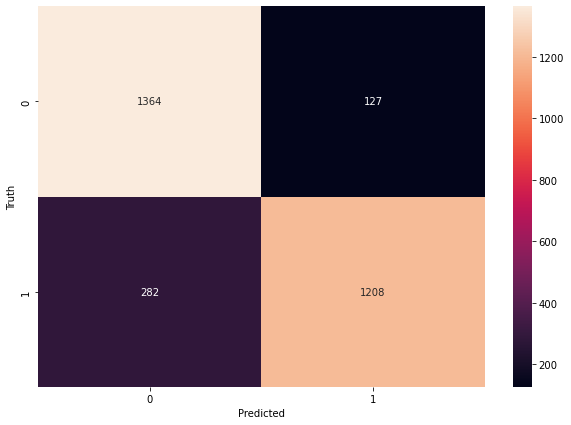

In [129]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=1,metric='manhattan')
model = GridSearchCV(knn,param_grid,cv=10, scoring='accuracy', return_train_score=False,verbose=1)

Fitting 10 folds for each of 147 candidates, totalling 1470 fits
GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=1),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)},
             scoring='accuracy', verbose=1)
Accuracy for our training dataset with tuning is : 0.94%
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1491
           1       0.91      0.98      0.94      1490

    accuracy                           0.94      2981
   macro avg       0.94      0.94      0.94      2981
weighted avg       0.94      0.94      0.94      2981



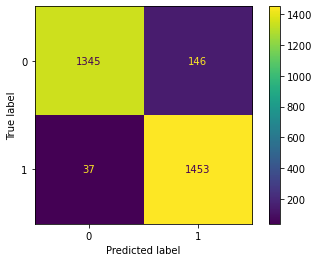

In [135]:
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_test_pred)
print(model)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(acc) )
print(classification_report(y_test,y_test_pred))
plot_confusion_matrix(model,X_test,y_test)
ax.set_title(str(model)); 

In [139]:
y_test_pred[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [141]:
y_test[:10]

3898     0
4046     0
8753     0
13565    1
9623     0
3528     1
4912     1
4598     0
1607     0
4658     0
Name: Exited, dtype: int64

In [140]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0]